# Example queries for Economic Characteristics on COVID-19 Knowledge Graph
[Work in progress]

This notebook demonstrates how to run Cypher queries to get [Economic Characteristics from the American Community Survey 2018 5-year data](https://data.census.gov/cedsci/table?tid=ACSDP5Y2018.DP03) at multiple levels of geographic granularity. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from py2neo import Graph

In [2]:
pd.options.display.max_rows = None  # display all rows
pd.options.display.max_columns = None  # display all columsns

#### Connect to COVID-19-Net Knowledge Graph

In [3]:
graph = Graph("bolt://132.249.238.185:7687", user="reader", password="demo")

## Economic Characteristics
The following variables are available for queries. Variable names ending with Pct represent values in percent, whereas all other variables represent counts. For details see [Subject Definitions](https://www2.census.gov/programs-surveys/acs/tech_docs/subject_definitions/2018_ACSSubjectDefinitions.pdf).

#### Commuting

             'DP03_0018E': 'workers16YearsAndOver',
             'DP03_0019E': 'droveAloneToWorkInCarTruckOrVan',
             'DP03_0019PE': 'droveAloneToWorkInCarTruckOrVanPct',
             'DP03_0020E': 'carpooledToWorkInCarTruckOrVan',
             'DP03_0020PE': 'carpooledToWorkInCarTruckOrVanPct',
             'DP03_0021E': 'publicTransportToWork',
             'DP03_0021PE': 'publicTransportToWorkPct',
             'DP03_0022E': 'walkedToWork',
             'DP03_0022PE': 'walkedToWorkPct',
             'DP03_0023E': 'otherMeansOfCommutingToWork',
             'DP03_0023PE': 'otherMeansOfCommutingToWorkPct',
             'DP03_0024E': 'workedAtHome',
             'DP03_0024PE': 'workedAtHomePct',
             'DP03_0025E': 'meanTravelTimeToWorkMinutes',

#### Employment

             'DP03_0001E': 'population16YearsAndOver',
             'DP03_0002E': 'population16YearsAndOverInLaborForce',
             'DP03_0002PE': 'population16YearsAndOverInLaborForcePct',
             'DP03_0003E': 'population16YearsAndOverInCivilianLaborForce',
             'DP03_0003PE': 'population16YearsAndOverInCivilianLaborForcePct',
             'DP03_0006E': 'population16YearsAndOverInArmedForces',
             'DP03_0006PE': 'population16YearsAndOverInArmedForcesPct',
             'DP03_0007E': 'population16YearsAndOverNotInLaborForce',
             'DP03_0007PE': 'population16YearsAndOverNotInLaborForcePct',

#### HealthInsurance

             'DP03_0095E': 'civilianNoninstitutionalizedPopulation',
             'DP03_0096E': 'withHealthInsuranceCoverage',
             'DP03_0096PE': 'withHealthInsuranceCoveragePct',
             'DP03_0097E': 'withPrivateHealthInsurance',
             'DP03_0097PE': 'withPrivateHealthInsurancePct',
             'DP03_0098E': 'withPublicCoverage',
             'DP03_0098PE': 'withPublicCoveragePct',
             'DP03_0099E': 'noHealthInsuranceCoverage',
             'DP03_0099PE': 'noHealthInsuranceCoveragePct',

#### Income

             'DP03_0051E': 'totalHouseholds',
             'DP03_0052E': 'householdIncomeLessThan10000USD',
             'DP03_0052PE': 'householdIncomeLessThan10000USDPct',
             'DP03_0053E': 'householdIncome10000To14999USD',
             'DP03_0053PE': 'householdIncome10000To14999USDPct',
             'DP03_0054E': 'householdIncome15000To24999USD',
             'DP03_0054PE': 'householdIncome15000To24999USDPct',
             'DP03_0055E': 'householdIncome25000To34999USD',
             'DP03_0055PE': 'householdIncome25000To34999USDPct',
             'DP03_0056E': 'householdIncome35000To49999USD',
             'DP03_0056PE': 'householdIncome35000To49999USDPct',
             'DP03_0057E': 'householdIncome50000To74999USD',
             'DP03_0057PE': 'householdIncome50000To74999USDPct',
             'DP03_0058E': 'householdIncome75000To99999USD',
             'DP03_0058PE': 'householdIncome75000To99999USDPct',
             'DP03_0059E': 'householdIncome100000To149999USD',
             'DP03_0059PE': 'householdIncome100000To149999USDPct',
             'DP03_0060E': 'householdIncome150000To199999USD',
             'DP03_0060PE': 'householdIncome150000To199999USDPct',
             'DP03_0061E': 'householdIncomeMoreThan200000USD',
             'DP03_0061PE': 'householdIncomeMoreThan200000USDPct',
             'DP03_0062E': 'medianHouseholdIncomeUSD',
             'DP03_0063E': 'meanHouseholdIncomeUSD',

#### Occupation

             'DP03_0026E': 'civilianEmployedPopulation16YearsAndOver',
             'DP03_0027E': 'managementBusinessScienceAndArtsOccupations',
             'DP03_0027PE': 'managementBusinessScienceAndArtsOccupationsPct',
             'DP03_0028E': 'serviceOccupations',
             'DP03_0028PE': 'serviceOccupationsPct',
             'DP03_0029E': 'salesAndOfficeOccupations',
             'DP03_0029PE': 'salesAndOfficeOccupationsPct',
             'DP03_0030E': 'naturalResourcesConstructionAndMaintenanceOccupations',
             'DP03_0030PE': 'naturalResourcesConstructionAndMaintenanceOccupationsPct',
             'DP03_0031E': 'productionTransportationAndMaterialMovingOccupations',
             'DP03_0031PE': 'productionTransportationAndMaterialMovingOccupationsPct'

## Geographic granularity
Data are available at 3 levels of granularity:
* US County
* US Zip Code
* US Census Tract

## Query Examples

### Get Data By US County

If the state and county fips codes are available, economic characteristics can be retrieved directly.

Note, fips codes are represented as strings.

##### Example: Commuting

In [4]:
state_fips = '06'
county_fips = '073'

In [5]:
query = """
MATCH (c:Commuting{countyFips:$county_fips, stateFips:$state_fips})
RETURN c.stateFips, c.countyFips, c.droveAloneToWorkInCarTruckOrVanPct, c.publicTransportToWorkPct, 
       c.walkedToWorkPct, c.otherMeansOfCommutingToWorkPct, c.workedAtHomePct
"""
df = graph.run(query, county_fips=county_fips, state_fips=state_fips).to_data_frame()
df.head()

,c.stateFips,c.countyFips,c.droveAloneToWorkInCarTruckOrVanPct,c.publicTransportToWorkPct,c.walkedToWorkPct,c.otherMeansOfCommutingToWorkPct,c.workedAtHomePct
0,06,073,76.3,2.9,2.9,2.3,7.0


Example: Get Employment characteristics by traversing the KG

In [6]:
county = 'Los Angeles County'

In [7]:
query = """
MATCH (a:Admin2{name:$admin2})-[:HAS_ECONOMICS]-(:Economics)-[:HAS_EMPLOYMENT]-(e:Employment)
RETURN a.name, e.population16YearsAndOverInLaborForcePct, e.population16YearsAndOverInCivilianLaborForcePct,
       e.population16YearsAndOverInArmedForcesPct, e.population16YearsAndOverNotInLaborForcePct
"""
df = graph.run(query, admin2=county).to_data_frame()
df.head()

,a.name,e.population16YearsAndOverInLaborForcePct,e.population16YearsAndOverInCivilianLaborForcePct,e.population16YearsAndOverInArmedForcesPct,e.population16YearsAndOverNotInLaborForcePct
0,Los Angeles County,64.5,64.4,0.0,35


### Get Data by US Postal Code

Note, postal codes are represented as strings.

In [8]:
zip_code = '92130'

In [9]:
query = """
MATCH (h:HealthInsurance{postalCode: $zip_code})
RETURN h.postalCode, h.withHealthInsuranceCoveragePct, h.withPrivateHealthInsurancePct,
       h.withPublicCoveragePct, h.noHealthInsuranceCoveragePct
"""
df = graph.run(query, zip_code=zip_code).to_data_frame()
df.head()

,h.postalCode,h.withHealthInsuranceCoveragePct,h.withPrivateHealthInsurancePct,h.withPublicCoveragePct,h.noHealthInsuranceCoveragePct
0,92130,97.6,88.7,14.6,2.4


##### Example: List income data for Zip codes with a place name

Note, Zip code areas may cross city boundaries. Place names are the preferred names used by the US Postal Service.

In [10]:
place_name = 'Chula Vista'

query = """
MATCH (p:PostalCode{placeName:$place_name})-[:HAS_ECONOMICS]-(:Economics)-[:HAS_INCOME]-(i:Income)
RETURN p.name AS `Zip code`, 
       i.medianHouseholdIncomeUSD AS `Median Household Income`, 
       i.meanHouseholdIncomeUSD AS `Mean Household Income`
"""
df = graph.run(query, place_name=place_name).to_data_frame()
df.head()

,Zip code,Median Household Income,Mean Household Income
0,91910,61922,78413
1,91911,58598,71107
2,91913,96617,117117
3,91914,133730,148439
4,91915,112083,122929


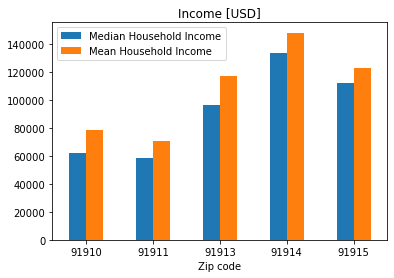

In [11]:
df.plot.bar(x='Zip code', 
            y=["Median Household Income", "Mean Household Income"], 
            title='Income [USD]', rot=0);

### Get Data by US Census Tract

Note, tracts are represented at strings.

##### Example: Occupations for a tract

In [12]:
tract = '06073008324'

In [13]:
query = """
MATCH (o:Occupation{tract: $tract})
RETURN o.tract,
       o.managementBusinessScienceAndArtsOccupationsPct,
       o.serviceOccupationsPct,
       o.salesAndOfficeOccupationsPct,
       o.naturalResourcesConstructionAndMaintenanceOccupationsPct,
       o.productionTransportationAndMaterialMovingOccupationsPct
"""
df = graph.run(query, tract=tract).to_data_frame()
df.head()

,o.tract,o.managementBusinessScienceAndArtsOccupationsPct,o.serviceOccupationsPct,o.salesAndOfficeOccupationsPct,o.naturalResourcesConstructionAndMaintenanceOccupationsPct,o.productionTransportationAndMaterialMovingOccupationsPct
0,06073008324,65.5,10.7,17.8,4.2,1.9


##### Example: List Occupations for all tracts in a county

In [14]:
state = 'California'
county = 'Orange County'

query = """
MATCH (a1:Admin1{name: $admin1})-[:IN]-(a2:Admin2{name: $admin2})-[:IN]-(t:Tract)-[:HAS_ECONOMICS]-(:Economics)-[:HAS_OCCUPATION]-(o:Occupation)
RETURN a1.name AS State, a2.name AS County, t.name AS Tract,
       o.managementBusinessScienceAndArtsOccupationsPct,
       o.serviceOccupationsPct,
       o.salesAndOfficeOccupationsPct,
       o.naturalResourcesConstructionAndMaintenanceOccupationsPct,
       o.productionTransportationAndMaterialMovingOccupationsPct
"""
df = graph.run(query, admin1=state, admin2=county).to_data_frame()
df.head()

,State,County,Tract,o.managementBusinessScienceAndArtsOccupationsPct,o.serviceOccupationsPct,o.salesAndOfficeOccupationsPct,o.naturalResourcesConstructionAndMaintenanceOccupationsPct,o.productionTransportationAndMaterialMovingOccupationsPct
0,California,Orange County,06059087505,18.8,18.2,33.1,14.0,15.9
1,California,Orange County,06059032061,57.4,10.6,27.7,3.0,1.4
2,California,Orange County,06059099903,29.4,21.7,21.2,11.5,16.1
3,California,Orange County,06059990100,-666666666.0,-666666666.0,-666666666.0,-666666666.0,-666666666.0
4,California,Orange County,06059099902,37.8,18.1,22.5,9.2,12.4
